<a href="https://colab.research.google.com/github/Salma-Kassem/DeepLearning/blob/main/ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ANN MNIST Example

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

print(tf.__version__)

2.11.0


##Load Dataset

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255, x_test/255

11490434/11490434 [==============================] - 0s 0us/step


### Visualize Dataset

In [ ]:
import math

def plot_images(images):
  fig = plt.figure()
  len_ = int(math.sqrt(len(images)))
  for y in range(len_):
    for x in range(len_):
      ind = y*len_+x+1
      fig.add_subplot(len_, len_, ind)
      plt.imshow(images[ind-1], cmap="gray")
      plt.xticks(np.array([]))
      plt.yticks(np.array([]))

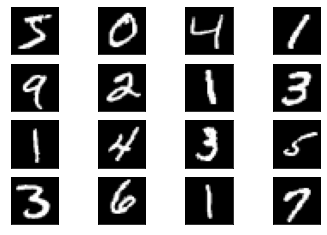

In [ ]:
plot_images(x_train[:16])

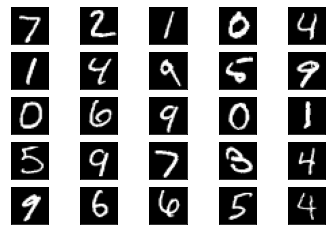

In [ ]:
plot_images(x_test[:25])

## Build Model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Set Loss Function and Optimizer

**Binary Classifier:**<br>
BinaryCrossentropy()<br>
**Multioutput Classifier:**<br>
SparseCategoricalCrossentropy() for numerical targets e.g., [0, 1, 2]<br>
CategoricalCrossentropy() for one-hot encoded vector targets e.g., [1,0,0], [0,1,0], [0,0,1]

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(), # Creates Adam optimizer with default params
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

## Train Model

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 2ms/step - loss: 0.2563 - accuracy: 0.9276
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1145 - accuracy: 0.9666
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0784 - accuracy: 0.9760
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0579 - accuracy: 0.9822
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0459 - accuracy: 0.9859


## Evaluate Model

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0727 - accuracy: 0.9766


[0.0726914033293724, 0.9765999913215637]